In [1]:
import pandas as pd
import numpy as np
import sqlite3
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# get general info about data (also available on kaggle)
conn = sqlite3.connect("../../FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("SELECT name, sql FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
df

,name,sql
0,ElementaryGeometries,CREATE VIRTUAL TABLE ElementaryGeometries USIN...
1,Fires,CREATE TABLE Fires (OBJECTID integer primary k...
2,KNN,CREATE VIRTUAL TABLE KNN USING VirtualKNN()
3,NWCG_UnitIDActive_20170109,CREATE TABLE NWCG_UnitIDActive_20170109 (OBJEC...
4,SpatialIndex,CREATE VIRTUAL TABLE SpatialIndex USING Virtua...
5,geometry_columns,CREATE TABLE geometry_columns (\nf_table_name ...
6,geometry_columns_auth,CREATE TABLE geometry_columns_auth (\nf_table_...
7,geometry_columns_field_infos,CREATE TABLE geometry_columns_field_infos (\nf...
8,geometry_columns_statistics,CREATE TABLE geometry_columns_statistics (\nf_...
9,geometry_columns_time,CREATE TABLE geometry_columns_time (\nf_table_...


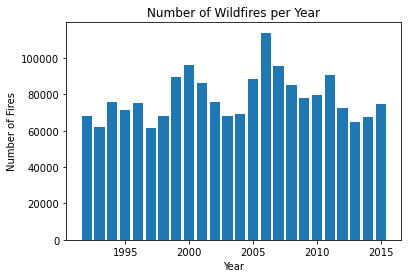

In [3]:
# make a chart showing number of fires per year
df = pd.read_sql_query("SELECT COUNT(FOD_ID) AS count, FIRE_YEAR FROM Fires GROUP BY FIRE_YEAR ORDER BY FIRE_YEAR", conn)
plt.bar(df['FIRE_YEAR'], df['count'])
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.title('Number of Wildfires per Year')
plt.show()

In [4]:
# list all the possible causes for fires
pd.read_sql_query("SELECT DISTINCT STAT_CAUSE_DESCR, STAT_CAUSE_CODE FROM Fires;", conn)

,STAT_CAUSE_DESCR,STAT_CAUSE_CODE
0,Miscellaneous,9.0
1,Lightning,1.0
2,Debris Burning,5.0
3,Campfire,4.0
4,Equipment Use,2.0
5,Arson,7.0
6,Children,8.0
7,Railroad,6.0
8,Smoking,3.0
9,Powerline,11.0


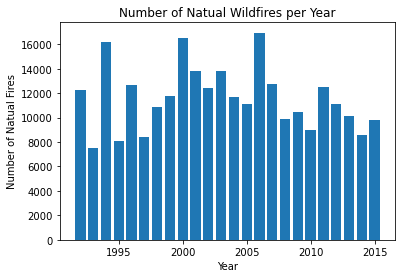

In [5]:
# make a chart showing number of naturally caused fires per year
df_natural = pd.read_sql_query("SELECT COUNT(FOD_ID) AS count, FIRE_YEAR FROM Fires WHERE STAT_CAUSE_CODE=1 GROUP BY FIRE_YEAR ORDER BY FIRE_YEAR", conn)
plt.bar(df_natural['FIRE_YEAR'], df_natural['count'])
plt.xlabel('Year')
plt.ylabel('Number of Natual Fires')
plt.title('Number of Natual Wildfires per Year')
plt.show()

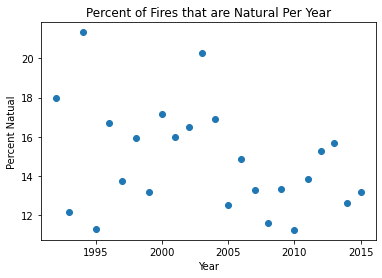

In [6]:
# show % makeup of natual wildfires
assert len(df_natural) == len(df)

plt.scatter(df['FIRE_YEAR'], df_natural['count']*100.0/df['count'])
plt.xlabel('Year')
plt.ylabel('Percent Natual')
plt.title('Percent of Fires that are Natural Per Year')
plt.show()

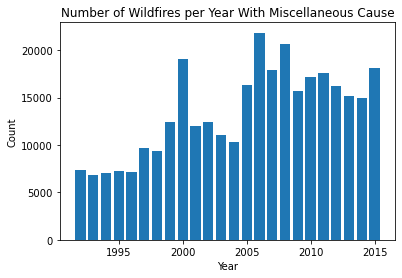

In [7]:
df_natural = pd.read_sql_query("SELECT COUNT(FOD_ID) AS count, FIRE_YEAR FROM Fires WHERE STAT_CAUSE_CODE=9 GROUP BY FIRE_YEAR ORDER BY FIRE_YEAR", conn)
plt.bar(df_natural['FIRE_YEAR'], df_natural['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Wildfires per Year With Miscellaneous Cause')
plt.show()

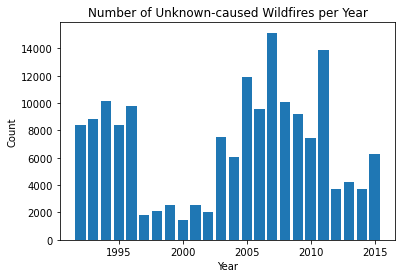

In [8]:
df_natural = pd.read_sql_query("SELECT COUNT(FOD_ID) AS count, FIRE_YEAR FROM Fires WHERE STAT_CAUSE_CODE=13 GROUP BY FIRE_YEAR ORDER BY FIRE_YEAR", conn)
plt.bar(df_natural['FIRE_YEAR'], df_natural['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Unknown-caused Wildfires per Year')
plt.show()

In [9]:
pd.read_sql_query("SELECT * FROM Fires WHERE STAT_CAUSE_CODE=9 LIMIT 10;", conn)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,13,13,FS-1418865,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.786667,-120.193333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_\x0c^\...
2,27,27,FS-1418898,FED,FS-FIRESTAT,FS,USNMLNF,Lincoln National Forest,0308,Lincoln National Forest,...,B,33.444444,-105.631111,14.0,MISSING/NOT SPECIFIED,NM,27,027,Lincoln,b'\x00\x01\xad\x10\x00\x00\xe4e\xda\x1fdhZ\xc0...
3,46,46,FS-1418934,FED,FS-FIRESTAT,FS,USNCNCF,National Forests in North Carolina,0811,National Forests in North Carolina,...,C,35.001389,-83.384167,14.0,MISSING/NOT SPECIFIED,NC,113,113,Macon,b'\x00\x01\xad\x10\x00\x00<\xf7\xcc/\x96\xd8T\...
4,47,47,FS-1418935,FED,FS-FIRESTAT,FS,USORUMF,Umatilla National Forest,0614,Umatilla National Forest,...,B,44.911111,-119.696111,5.0,USFS,OR,69,069,Wheeler,b'\x00\x01\xad\x10\x00\x00@\xf5\x9c\x15\x8d\xe...
5,52,52,FS-1418953,FED,FS-FIRESTAT,FS,USORFWF,Fremont-Winema National Forest,0602,Fremont-Winema National Forest,...,A,42.311389,-120.902778,5.0,USFS,OR,37,037,Lake,"b""\x00\x01\xad\x10\x00\x00\xf0)t\x1c\xc79^\xc0..."
6,54,54,FS-1418965,FED,FS-FIRESTAT,FS,USWYBHF,Bighorn National Forest,0202,Bighorn National Forest,...,A,44.816111,-107.331111,5.0,USFS,WY,33,033,Sheridan,b'\x00\x01\xad\x10\x00\x00\xb02\xa7\xec0\xd5Z\...
7,66,66,FS-1418995,FED,FS-FIRESTAT,FS,USMTKNF,Kootenai National Forest,0114,Kootenai National Forest,...,A,48.906944,-115.076667,13.0,STATE OR PRIVATE,MT,53,053,Lincoln,b'\x00\x01\xad\x10\x00\x00\xf4\x15R\x1b\xe8\xc...
8,73,74,FS-1419045,FED,FS-FIRESTAT,FS,USMTKNF,Kootenai National Forest,0114,Kootenai National Forest,...,B,48.894444,-115.165278,13.0,STATE OR PRIVATE,MT,53,053,Lincoln,"b""\x00\x01\xad\x10\x00\x00\xbc\xf6@\xe9\x93\xc..."
9,75,76,FS-1419050,FED,FS-FIRESTAT,FS,USMTKNF,Kootenai National Forest,0114,Kootenai National Forest,...,A,48.962500,-115.085556,13.0,STATE OR PRIVATE,MT,53,053,Lincoln,b'\x00\x01\xad\x10\x00\x008\x0c\x07\xbey\xc5\\...


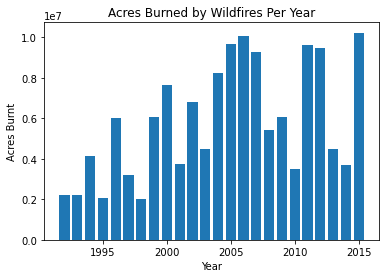

In [10]:
df = pd.read_sql_query("""
    SELECT 
        SUM(FIRE_SIZE) AS acres, 
        FIRE_YEAR
    FROM Fires GROUP BY FIRE_YEAR ORDER BY FIRE_YEAR
    """, conn)
plt.bar(df['FIRE_YEAR'], df['acres'])
plt.xlabel('Year')
plt.ylabel('Acres Burnt')
plt.title('Acres Burned by Wildfires Per Year')
plt.show()

In [27]:
df = pd.read_sql_query("""
    SELECT 
        FIRE_SIZE, 
        FIRE_YEAR,
        CONT_DOY,
        STAT_CAUSE_DESCR,
        STAT_CAUSE_CODE,
        LATITUDE,
        LONGITUDE
    FROM Fires ORDER BY FIRE_YEAR
    """, conn)

df = df.dropna()
df

,FIRE_SIZE,FIRE_YEAR,CONT_DOY,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE
0,1.00,1992,140.0,Lightning,1.0,45.360000,-113.078333
1,0.60,1992,219.0,Lightning,1.0,44.540000,-112.683333
2,0.10,1992,281.0,Campfire,4.0,44.516667,-112.983333
3,0.10,1992,298.0,Campfire,4.0,44.690000,-112.730000
4,0.10,1992,159.0,Campfire,4.0,45.763333,-112.820000
...,...,...,...,...,...,...,...
1880456,2.22,2015,165.0,Missing/Undefined,13.0,40.019907,-122.391398
1880457,1.00,2015,274.0,Arson,7.0,40.588583,-123.069617
1880458,4.00,2015,218.0,Lightning,1.0,40.244833,-123.544167
1880459,0.50,2015,148.0,Miscellaneous,9.0,38.415608,-122.660044


In [36]:
from sklearn.linear_model import LinearRegression
X = np.array(df[['FIRE_YEAR','CONT_DOY','LATITUDE','LONGITUDE']])
y = np.array(df['FIRE_SIZE'])
reg = LinearRegression().fit(X, y)

In [37]:
reg.score(X, y)

0.0032542712621932424